In [1]:
FROM_CACHE = False

In [2]:
import winobias
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions
from pytorch_transformers import GPT2Tokenizer
import json

## Dev Set Results GPT2-Medium (filtering on odds ratio): 

In [3]:
fname = 'winobias_data/attention_intervention_results_gpt2medium_filtered.json'
if not FROM_CACHE:
	quantile = 0.25
	model = Model(output_attentions=True, gpt2_version='gpt2-medium')
	tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
	examples = winobias.load_dev_examples()
	
	df = winobias.analyze(examples)
	df_expected = df[df.odds_ratio > 1]
	threshold = df_expected.odds_ratio.quantile(quantile)
	
	filtered_examples = []
	assert len(examples) == len(df)
	for i in range(len(examples)):
		ex = examples[i]
		odds_ratio = df.iloc[i].odds_ratio
		if odds_ratio > threshold:
	
			filtered_examples.append(ex)
	print(f'Num examples with odds ratio > 1: {len(df_expected)} / {len(examples)}')
	
	print(f'Num examples with odds ratio > {threshold:.4f} ({quantile} quantile): {len(filtered_examples)} / {len(examples)}')
			 
	examples = filtered_examples
	
	interventions = [ex.to_intervention(tokenizer) for ex in examples]
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

Split: DEV, Filtered: False
Loaded 160 pairs. Skipped 38 pairs.
Num examples with odds ratio > 1: 116 / 160
Num examples with odds ratio > 1.0497 (0.25 quantile): 87 / 160


100%|██████████| 87/87 [5:30:56<00:00, 228.24s/it]


### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 87
Mean total effect: 0.59

INDIRECT Effect (mean = 0.001242994638033133)
Top 10 heads:
   6 15: 0.08573982517279138 (p=0.0000)
   10 9: 0.08022241138226899 (p=0.0000)
   12 14: 0.04534613834888054 (p=0.0000)
   10 12: 0.04417945323619007 (p=0.0000)
   9 14: 0.03743980732617964 (p=0.0000)
   11 6: 0.022199883276092198 (p=0.0000)
   9 3: 0.018972401496661215 (p=0.0000)
   6 10: 0.017730669290526083 (p=0.0000)
   12 0: 0.015943354610290148 (p=0.0000)
   9 8: 0.015079667658164386 (p=0.0000)

DIRECT Effect (mean = 0.5844678924582474)
Top 10 heads:
   10 9: 0.4730769220887464 (p=0.1261)
   6 15: 0.493295855145773 (p=0.1744)
   10 12: 0.5061319118269302 (p=0.2104)
   12 14: 0.5066462667607408 (p=0.2119)
   11 6: 0.5471043344694136 (p=0.3505)
   9 14: 0.5479389890097082 (p=0.3537)
   12 0: 0.5572569080201598 (p=0.3899)
   10 13: 0.5639935587158148 (p=0.4167)
   9 3: 0.5664372241911317 (p=0.4265)
   6 10: 0.5668339445951512 (p=0.4281)


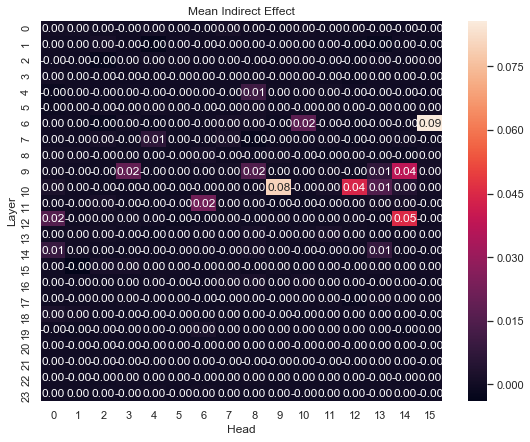

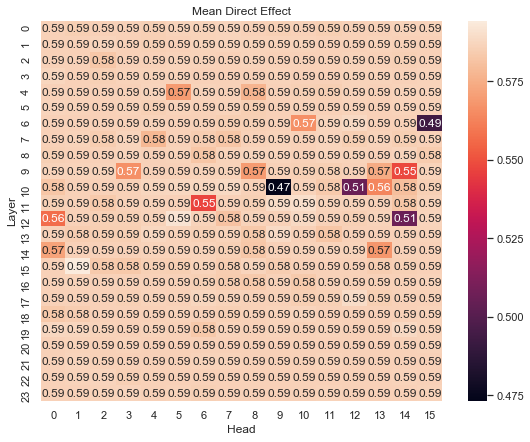

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 87
Mean total effect: 0.59


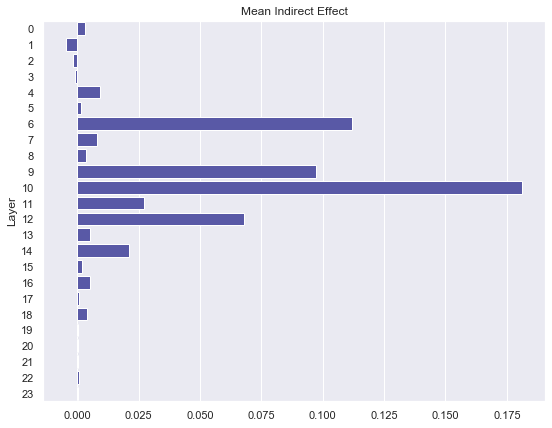

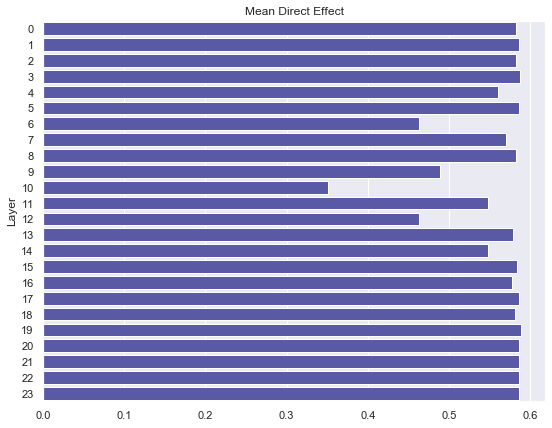

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.25557
p(c2|x') / p(c1|x') = 0.30914

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.210


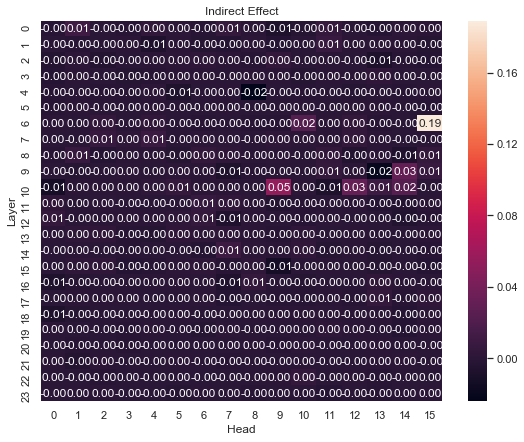

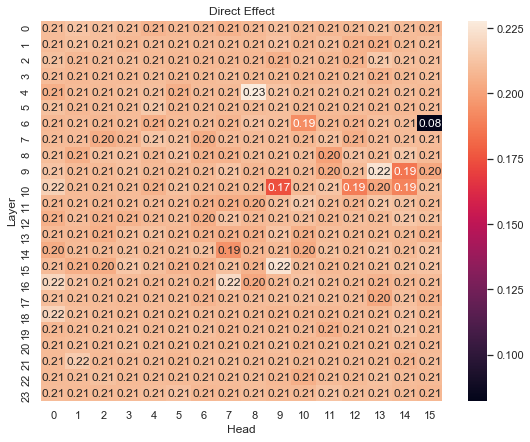

In [6]:
report_intervention(results[0])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.29167
p(c2|x') / p(c1|x') = 1.05049

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 2.602


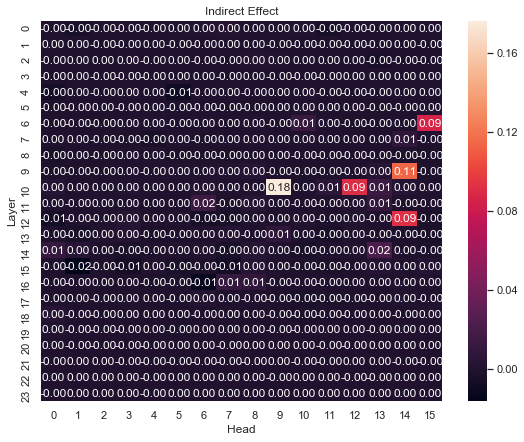

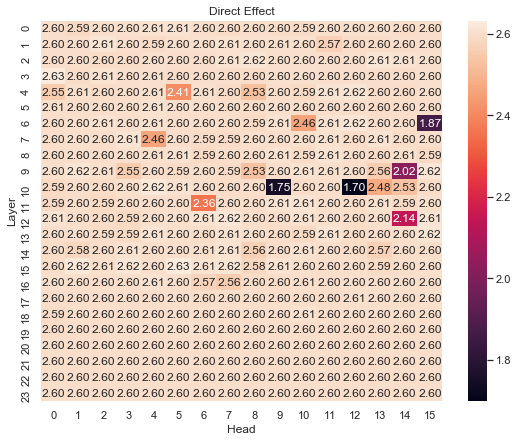

In [7]:
report_intervention(results[1])

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.05395
p(c2|x') / p(c1|x') = 0.07711

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.429


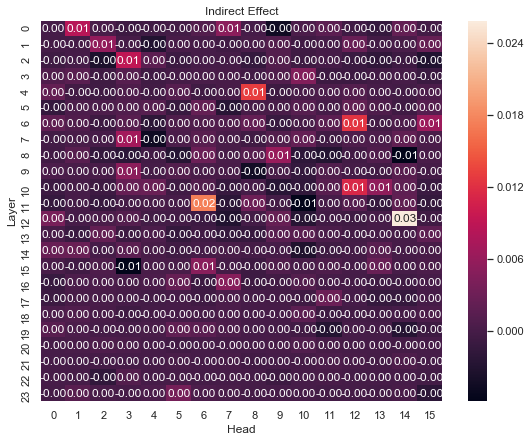

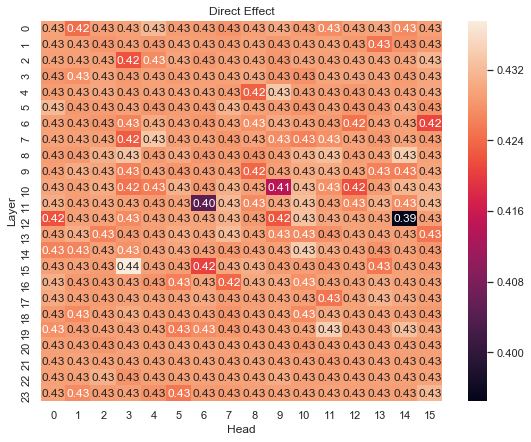

In [8]:
report_intervention(results[2])

x : The farmer offered apples to the housekeeper, because she
x': The farmer offered apples to the housekeeper, because he
c1: might like them .
c2: had too many of them .

p(c2|x) / p(c1|x) = 2.35759
p(c2|x') / p(c1|x') = 3.35188

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.422


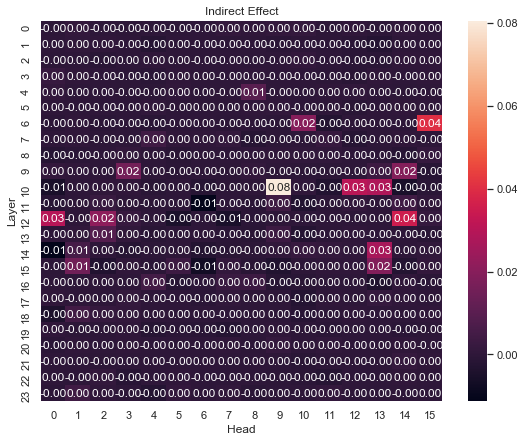

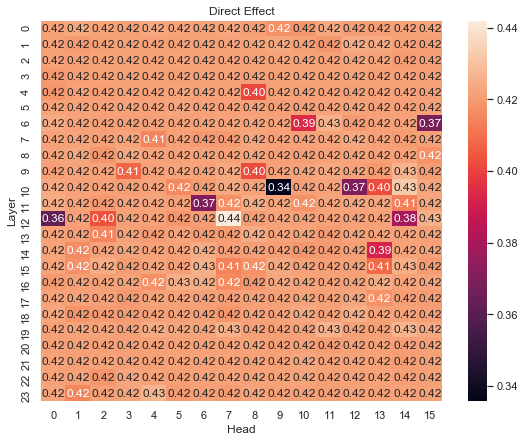

In [9]:
report_intervention(results[3])
